In [35]:
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

## ProphetÏúºÎ°ú ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°
- prophet : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌï† Ïàò ÏûàÎäî Ìå®ÌÇ§ÏßÄ. facebookÏóêÏÑú ÎßåÎì§ÏóàÎã§.

In [36]:
df=pd.read_csv('sales_data.csv',encoding='unicode_escape')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
338919    566571     23390             DOLLY GIRL MINI BACKPACK       4.0   
338920    566571     22949                36 DOILIES DOLLY GIRL      12.0   
338921    566571     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
338922    566571     23203             JUMBO BAG VINTAGE DOILY       10.0   
338923    566571     21931                                    J       NaN   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
338919  9/13/2011 12:49       4.15     17037.0  United Kingdom  
338920  9/13/2011 12:49       1.45     17037.0  United Kingdom  
338921  9/13/2011 12:49       4.95     17037.0  United Kingdom  
338922  9/13/2011 12:49       2.08     17037.0  United Kingdom  
338923              NaN        NaN         NaN             NaN  

[338924 rows x 8 columns]

# Prophet
- Î≥ÄÏàòÍ∞Ä ÌïÑÏöî ÏóÜÎã§. Ïã§Ï†ú ÏòàÏ∏°Ìï† Í∞íÍ≥º ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îßå ÏûàÏúºÎ©¥ ÏòàÏ∏° Í∞ÄÎä•
- ÏãúÍ≥ÑÏó¥Í≥º ÏòàÏ∏°Í∞íÏùÑ ÎßåÎìúÎäîÎç∞ ÌäπÏ†ï ÏπºÎüºÏúºÎ°ú ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§.
- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ds ÏòàÏ∏°Í∞íÏùÄ yÎ°ú ÏÑ§Ï†ï

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338924 entries, 0 to 338923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    338924 non-null  object 
 1   StockCode    338924 non-null  object 
 2   Description  337739 non-null  object 
 3   Quantity     338923 non-null  float64
 4   InvoiceDate  338923 non-null  object 
 5   UnitPrice    338923 non-null  float64
 6   CustomerID   246728 non-null  float64
 7   Country      338923 non-null  object 
dtypes: float64(3), object(5)
memory usage: 20.7+ MB


In [38]:
# InvoiceDate ÏπºÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338924 entries, 0 to 338923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    338924 non-null  object        
 1   StockCode    338924 non-null  object        
 2   Description  337739 non-null  object        
 3   Quantity     338923 non-null  float64       
 4   InvoiceDate  338923 non-null  datetime64[ns]
 5   UnitPrice    338923 non-null  float64       
 6   CustomerID   246728 non-null  float64       
 7   Country      338923 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 20.7+ MB


# Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ

In [40]:
df_1 = df.copy()

# Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎüâÏù¥ -Ïù∏ Í≤ΩÏö∞ Ï°¥Ïû¨ => Î∞òÌíà
# -Í∞íÏùÄ ÎÇ†Î¶¨Í≥† +Îßå Î∂ÑÏÑù ÏßÑÌñâ
df_1=df_1[df_1.Quantity>0]
df_1=df_1[df_1.UnitPrice>0]

In [41]:
# ttpÍ∞Ä Ïã§Ï†úÎ°ú ÏòàÏ∏°Ìï† Î≥ÄÏàò
df_1['ttp']= df_1['Quantity'] * df_1['UnitPrice']
df_1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
338918    566571     22974             CHILDRENS DOLLY GIRL MUG      12.0   
338919    566571     23390             DOLLY GIRL MINI BACKPACK       4.0   
338920    566571     22949                36 DOILIES DOLLY GIRL      12.0   
338921    566571     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
338922    566571     23203             JUMBO BAG VINTAGE DOILY       10.0   

               InvoiceDate  UnitPrice  CustomerID         Country    ttp  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
...                    ...        ...         ...             ...    ...  
338918 2011-09-13 12:49:00       1.65     17037.0  United Kingdom  19.80  
338919 2011-09-13 12:49:00       4.15     17037.0  United Kingdom  16.60  
338920 2011-09-13 12:49:00       1.45     17037.0  United Kingdom  17.40  
338921 2011-09-13 12:49:00       4.95     17037.0  United Kingdom  14.85  
338922 2011-09-13 12:49:00       2.08     17037.0  United Kingdom  20.80  

[330979 rows x 9 columns]

In [42]:
df_psp = df_1[['InvoiceDate','ttp']]
# InvoiceDateÎ•º dsÎ°ú, ttpÎ•º yÎ°ú ÏÑ§Ï†ï!
df_psp.rename(columns = {'InvoiceDate':'ds','ttp':'y'}, inplace = True)

In [43]:
df_psp

ds      y
0      2010-12-01 08:26:00  15.30
1      2010-12-01 08:26:00  20.34
2      2010-12-01 08:26:00  22.00
3      2010-12-01 08:26:00  20.34
4      2010-12-01 08:26:00  20.34
...                    ...    ...
338918 2011-09-13 12:49:00  19.80
338919 2011-09-13 12:49:00  16.60
338920 2011-09-13 12:49:00  17.40
338921 2011-09-13 12:49:00  14.85
338922 2011-09-13 12:49:00  20.80

[330979 rows x 2 columns]

## ÏùºÎ≥Ñ Ï£ºÎ¨∏ÎüâÏúºÎ°ú Ï†ïÎ¶¨ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Ïûê

In [44]:
df_psp = df_psp.set_index("ds")
df_f = df_psp.resample('D')['y'].sum()

In [45]:
df_f = df_f.to_frame()
df_f

y
ds                  
2010-12-01  58960.79
2010-12-02  47748.38
2010-12-03  46943.71
2010-12-04      0.00
2010-12-05  31774.95
...              ...
2011-09-09  30075.62
2011-09-10      0.00
2011-09-11  35511.67
2011-09-12  29738.33
2011-09-13  30436.69

[287 rows x 1 columns]

<Axes: xlabel='ds'>

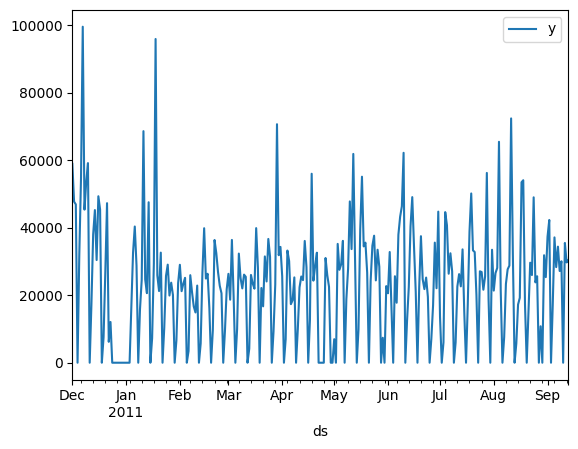

In [46]:
df_f.plot()

- 2010ÎÖÑ 12Ïõî ~ 2011ÎÖÑ 12ÏõîÍπåÏßÄ Ï†êÏ†ê Ïö∞ÏÉÅÌñ• Í≤ΩÌñ•
- ÏûêÍ∏∞Í∞Ä ÏïåÏïÑÏÑú Í≥ÑÏ†àÏÑ± Ïû°ÏïÑÏ£ºÍ≥†, Ï∂îÏÑ∏ Ìä∏Î†åÎìú ÌôïÏù∏ ÌõÑ ÏòàÏ∏°Ìï¥Ï§ÄÎã§


In [47]:
df_f.reset_index(inplace = True) # Ïù∏Îç±Ïä§Î•º Îã§Ïãú ÌíÄÏñ¥ÏÑú Îëê Ïª¨ÎüºÏúºÎ°ú ÎßåÎì†Îã§
df_f

ds         y
0   2010-12-01  58960.79
1   2010-12-02  47748.38
2   2010-12-03  46943.71
3   2010-12-04      0.00
4   2010-12-05  31774.95
..         ...       ...
282 2011-09-09  30075.62
283 2011-09-10      0.00
284 2011-09-11  35511.67
285 2011-09-12  29738.33
286 2011-09-13  30436.69

[287 rows x 2 columns]

In [56]:
#train, test set ÎÇòÎàÑÍ∏∞
# train Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÎØ∏Îûò 30ÏùºÏùÑ ÏòàÏ∏°ÌïòÏó¨ test Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµêÌï¥ÏÑú Ïã§Ï†ú Í∞íÏù¥ Ïñ¥Îñ§ÏßÄ ÌôïÏù∏ÌïúÎã§

train=df_f[:240]
test = df_f[240:] #ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî shuffle ÌïòÏßÄ ÏïäÎäîÎã§.

In [57]:
train

ds          y
0   2010-12-01  58960.790
1   2010-12-02  47748.380
2   2010-12-03  46943.710
3   2010-12-04      0.000
4   2010-12-05  31774.950
..         ...        ...
235 2011-07-24  27099.460
236 2011-07-25  26887.150
237 2011-07-26  21644.261
238 2011-07-27  25602.930
239 2011-07-28  56269.740

[240 rows x 2 columns]

# prophetÏóê Îì§Ïñ¥Í∞ÄÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Îã§ Ï†ïÎ¶¨
- Ïã§Ï†ú Í∞íÏùÑ ÎÑ£Ïñ¥ÏÑú ÏòàÏ∏°Í∞íÏù¥ Î≥ÄÌôîÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÍ∏∞( ÏΩîÎìú & Ï£ºÏÑù ÌïÑÏàò )

## 1. changepoint_prior_scale : 0.05 [default]
-Ï∂îÏÑ∏Ïóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Ïú†Ïó∞ÌïòÍ≤å Î∞òÏòÅÌï† Í±¥ÏßÄ Ï∂îÏÑ∏Ïóê Ïú†Ïó∞ÌïòÏßÄ ÏïäÍ≤å Î∞òÏòÅÌï† Í±¥ÏßÄ Í≤∞Ï†ïÌïòÎäî parameter
-Ï∂îÏÑ∏Ïóê Îçú Ïú†Ïó∞ÌïòÍ≤å Î∞òÏòÅÌïòÎ†§Î©¥ default Í∞íÏù∏ 0.05 Î≥¥Îã§ ÏûëÍ≤å ÏÑ§Ï†ï
-Ï∂îÏÑ∏Ïóê Ïú†Ïó∞ÌïòÍ≤å Î∞òÏòÅÌïòÎ†§Î©¥ 0.05 Î≥¥Îã§ ÌÅ¨Í≤å ÏÑ§Ï†ï

-Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Í∏∞Ï§ÄÏùºÏóê Ï†ÑÎÇ†ÍπåÏßÄ Î∞òÏòÅÌï† Í±∞Î©¥ lower_window = -1, upper_window = 0
-Í∏∞Ï§ÄÏùºÏóê Îã§ÏùåÎÇ†ÍπåÏßÄ Î∞òÏòÅÌïòÎ©¥ lower_window = 0, upper_window = 1

- changepoint_prior_scale = 0.01 Î°ú ÏÑ§Ï†ï

In [58]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear')
prophet.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/dc6phdbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/2lt2nkf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80149', 'data', 'file=/tmp/tmplueazx_e/dc6phdbf.json', 'init=/tmp/tmplueazx_e/2lt2nkf7.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modeluawta3m7/prophet_model-20230702084918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)

In [63]:
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
ph_yhat

ds          yhat
240 2011-07-29  25785.720844
241 2011-07-30    214.179435
242 2011-07-31  11779.753108
243 2011-08-01  26017.609200
244 2011-08-02  38281.070480
245 2011-08-03  26990.066215
246 2011-08-04  32872.850571
247 2011-08-05  25831.216731
248 2011-08-06    259.675322
249 2011-08-07  11825.248995
250 2011-08-08  26063.105087
251 2011-08-09  38326.566367
252 2011-08-10  27035.562102
253 2011-08-11  32918.346458
254 2011-08-12  25876.712618
255 2011-08-13    305.171209
256 2011-08-14  11870.744883
257 2011-08-15  26108.600974
258 2011-08-16  38372.062254
259 2011-08-17  27081.057989
260 2011-08-18  32963.842345
261 2011-08-19  25922.208506
262 2011-08-20    350.667097
263 2011-08-21  11916.240770
264 2011-08-22  26154.096861
265 2011-08-23  38417.558141
266 2011-08-24  27126.553876
267 2011-08-25  33009.338232
268 2011-08-26  25967.704393
269 2011-08-27    396.162984
270 2011-08-28  11961.736657
271 2011-08-29  26199.592748
272 2011-08-30  38463.054028
273 2011-08-31  27172.049764
274 2011-09-01  33054.834120
275 2011-09-02  26013.200280
276 2011-09-03    441.658871
277 2011-09-04  12007.232544
278 2011-09-05  26245.088635
279 2011-09-06  38508.549916

In [61]:
test

ds         y
240 2011-07-29  18790.40
241 2011-07-30      0.00
242 2011-07-31  33490.61
243 2011-08-01  21388.92
244 2011-08-02  26580.60
245 2011-08-03  28113.14
246 2011-08-04  65502.21
247 2011-08-05  21538.58
248 2011-08-06      0.00
249 2011-08-07   7578.91
250 2011-08-08  23377.65
251 2011-08-09  27679.44
252 2011-08-10  28792.34
253 2011-08-11  72433.79
254 2011-08-12  32231.35
255 2011-08-13      0.00
256 2011-08-14   5718.57
257 2011-08-15  17243.97
258 2011-08-16  19239.66
259 2011-08-17  53499.96
260 2011-08-18  54106.93
261 2011-08-19  17349.59
262 2011-08-20      0.00
263 2011-08-21  14576.86
264 2011-08-22  29651.46
265 2011-08-23  25993.68
266 2011-08-24  49035.36
267 2011-08-25  23827.46
268 2011-08-26  25626.44
269 2011-08-27      0.00
270 2011-08-28  10805.03
271 2011-08-29      0.00
272 2011-08-30  31866.31
273 2011-08-31  25380.17
274 2011-09-01  37370.15
275 2011-09-02  42322.02
276 2011-09-03      0.00
277 2011-09-04  17119.59
278 2011-09-05  37157.14
279 2011-09-06  28349.91
280 2011-09-07  34413.53
281 2011-09-08  27195.80
282 2011-09-09  30075.62
283 2011-09-10      0.00
284 2011-09-11  35511.67
285 2011-09-12  29738.33
286 2011-09-13  30436.69

          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  13028.852698  44482.736786
1 2010-12-02  34383.483376  18573.008048  51159.681599
2 2010-12-03  27295.727631   9994.001726  43472.981036
3 2010-12-04   1678.064316 -14806.286483  16483.995847
4 2010-12-05  13197.516084  -3838.000529  29628.779065


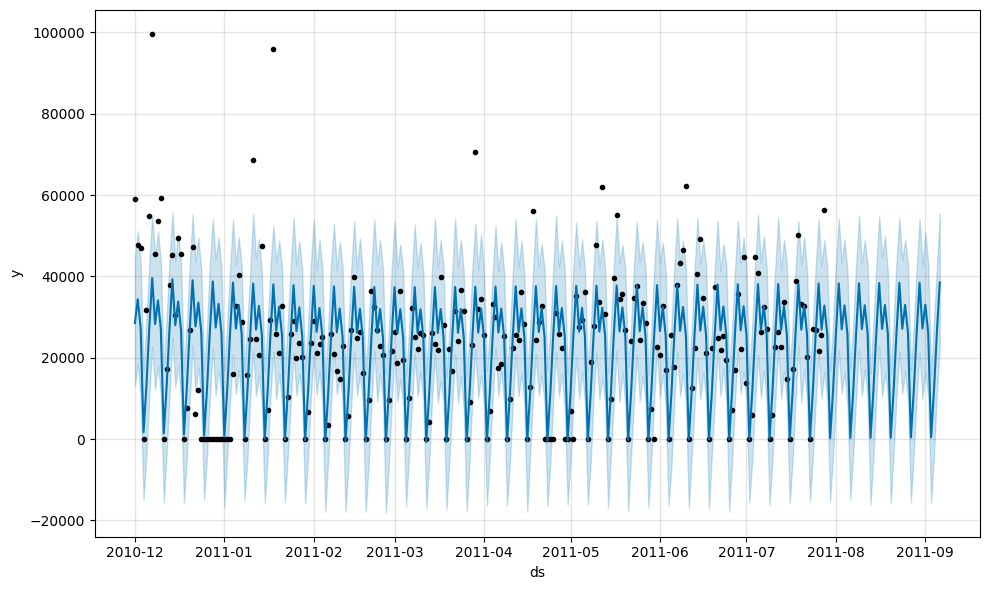

In [62]:
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

- changepoint_prior_scale = 0.001 Î°ú ÏÑ§Ï†ï

In [55]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear', changepoint_prior_scale = 0.01)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/bv59hxzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/l2ctlrj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65691', 'data', 'file=/tmp/tmplueazx_e/bv59hxzn.json', 'init=/tmp/tmplueazx_e/l2ctlrj3.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model9j5mdbkv/prophet_model-20230702084820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:48:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  13028.852698  44482.736786
1 2010-12-02  34383.483376  18573.008048  51159.681599
2 2010-12-03  27295.727631   9994.001726  43472.981036
3 2010-12-04   1678.064316 -14806.286483  16483.995847
4 2010-12-05  13197.516084  -3838.000529  29628.779065


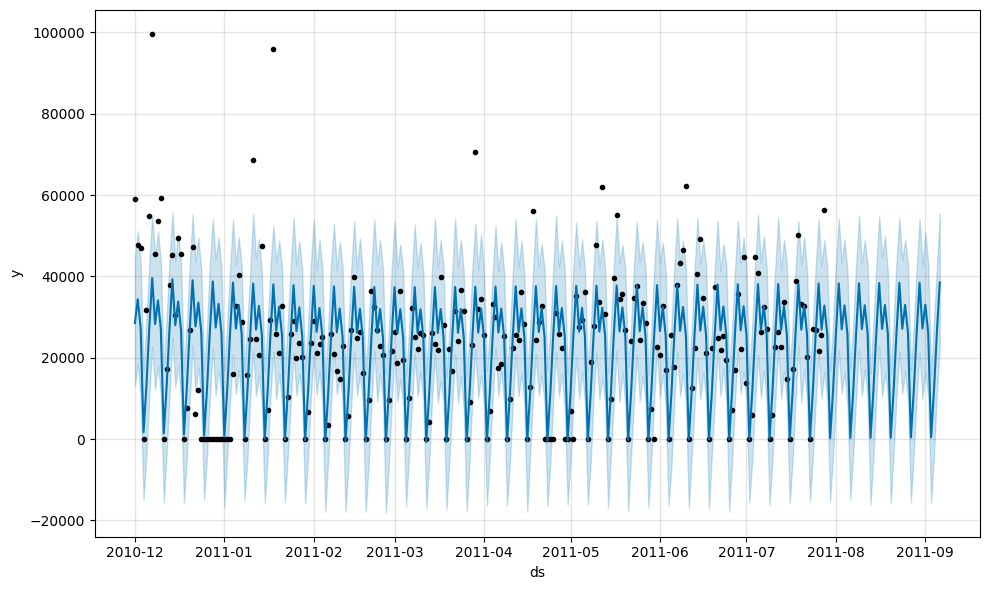

In [65]:
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## seasonality_prior_scale : 10 [default]
- Í≥ÑÏ†àÏùò Ïú†Ïó∞ÏÑ±ÏùÑ Ï†úÏñ¥ÌïòÎäî parameter Í∞íÏù¥ ÌÅ¨Î©¥ Í≥ÑÏ†àÏÑ±Ïùò ÏòÅÌñ•Ïù¥ Ïª§ÏßÄÍ≥† Í∞íÏù¥ ÏûëÏïÑÏßÄÎ©¥ Í≥ÑÏ†àÏÑ±Ïùò ÏòÅÌñ•Ïù¥ Ï§ÑÏñ¥Îì¶
Ìï©Î¶¨Ï†ÅÏù∏ Ï°∞Ï†ï Î≤îÏúÑÎäî [0.01,10] ÏÇ¨Ïù¥

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/nrsxjo4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/u6p3lrfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15370', 'data', 'file=/tmp/tmplueazx_e/nrsxjo4k.json', 'init=/tmp/tmplueazx_e/u6p3lrfx.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modelwuxj2eu8/prophet_model-20230702085233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  29188.354355  13515.786790  44167.689536
1 2010-12-02  34688.041047  18337.189361  49676.018392
2 2010-12-03  27985.719270  11080.718619  44375.123420
3 2010-12-04   3794.875794 -13139.639891  19263.719865
4 2010-12-05  14656.512061  -2493.318241  30392.445088


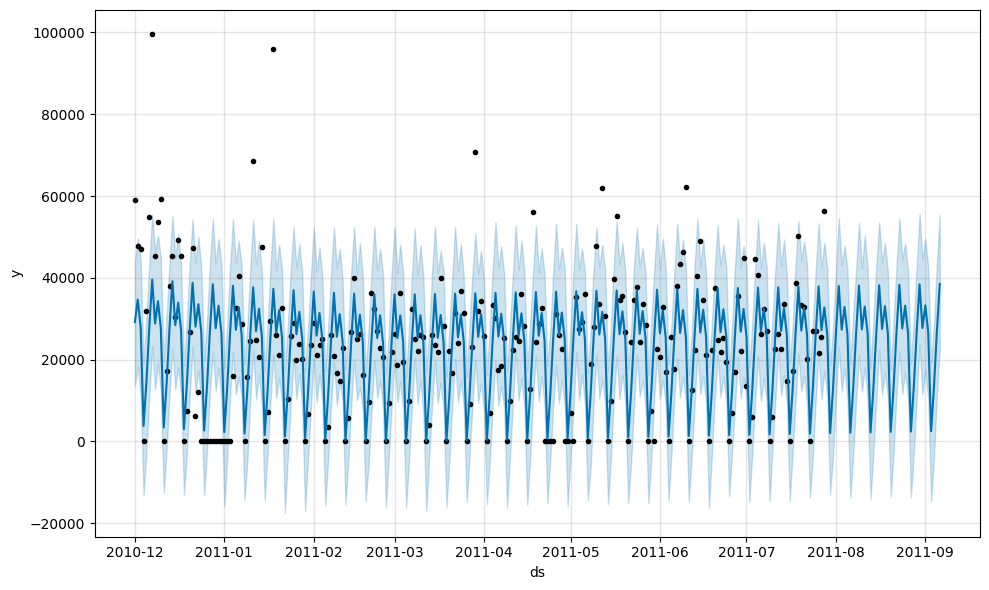

In [66]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear',seasonality_prior_scale = 0.05)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/jm5x8lop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/nobol2xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54319', 'data', 'file=/tmp/tmplueazx_e/jm5x8lop.json', 'init=/tmp/tmplueazx_e/nobol2xw.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modelz1i8qqwq/prophet_model-20230702085242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28493.635602  12093.363867  43517.815183
1 2010-12-02  34305.864767  17665.341066  50278.734201
2 2010-12-03  27249.362329  10725.259753  44135.456148
3 2010-12-04   1728.820036 -14562.949665  18042.544796
4 2010-12-05  13206.469596  -4121.319081  30535.654039


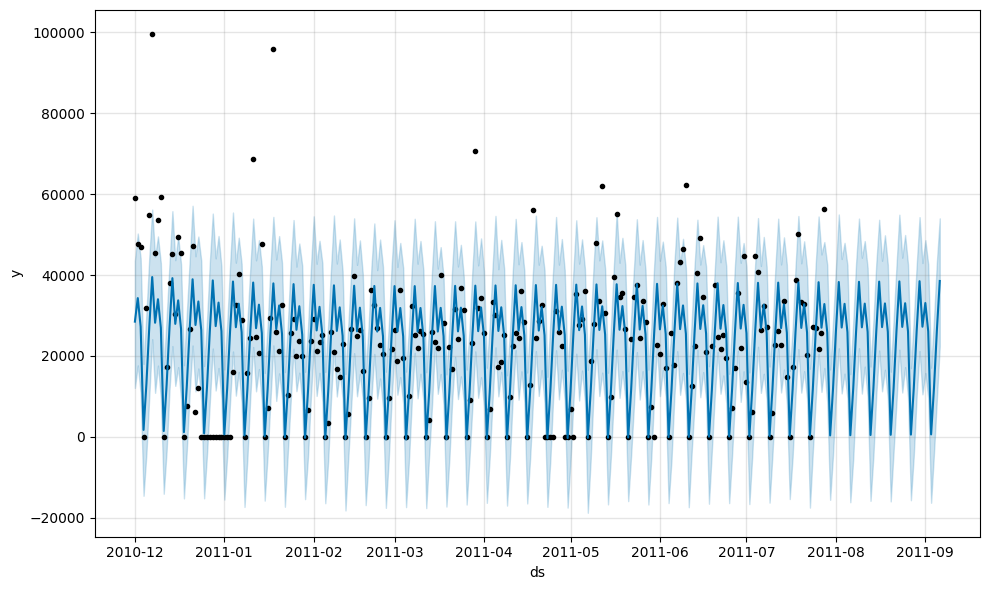

In [67]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear',seasonality_prior_scale = 5)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## holidays_prior_scale : 10.0 [default]
- Ìú¥ÏùºÏùò ÏòÅÌñ•Ïóê Îî∞Îùº Ïú†Ïó∞ÏÑ±ÏùÑ Ï°∞Ï†àÌïòÎäî parameter
Ï°∞Ï†à Î≤îÏúÑÎäî [0.01,10]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/na0r3j4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/t55s9ibt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3516', 'data', 'file=/tmp/tmplueazx_e/na0r3j4m.json', 'init=/tmp/tmplueazx_e/t55s9ibt.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model1_k47u8r/prophet_model-20230702085403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  11298.968111  45528.986603
1 2010-12-02  34383.483376  18051.133840  51879.667966
2 2010-12-03  27295.727631  11183.820255  44023.207803
3 2010-12-04   1678.064316 -14548.198384  18006.275410
4 2010-12-05  13197.516084  -3138.929357  28750.455669


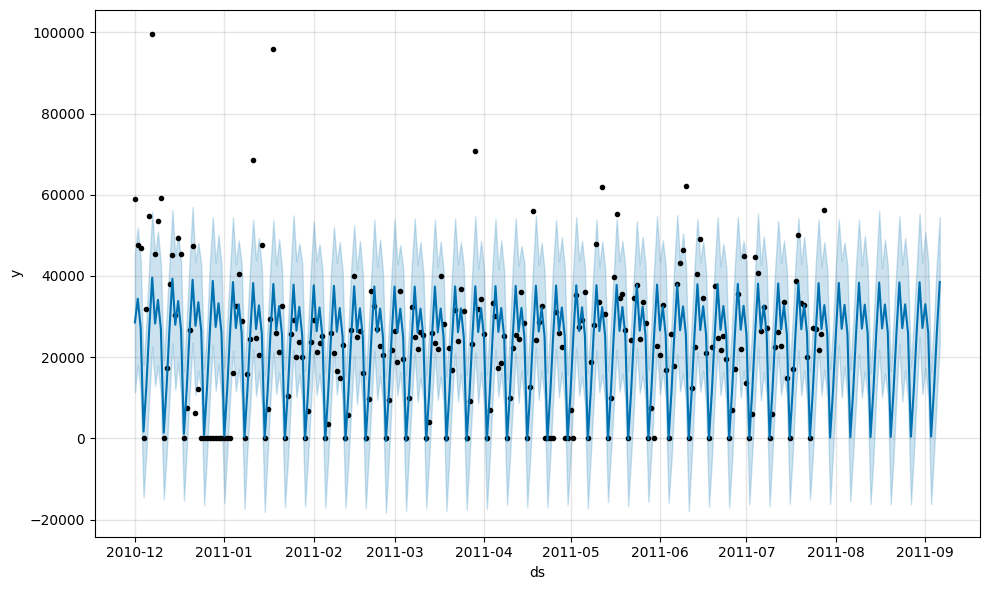

In [68]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear',holidays_prior_scale = 1)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## seasonality_mode : 'additive' [default]
- ÏòµÏÖòÏóêÎäî ['addtive','multiflicative']
'addtive' : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßÑÌè≠Ïù¥ ÏùºÏ†ïÌï† Îïå ÏÇ¨Ïö©
'multiflicative' : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏßÑÌè≠Ïù¥ Ï†êÏ†ê Ï¶ùÍ∞ÄÌïòÍ±∞ÎÇò Í∞êÏÜåÌï† Îïå ÏÇ¨Ïö©



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/97ofimty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/ryy15ugd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94623', 'data', 'file=/tmp/tmplueazx_e/97ofimty.json', 'init=/tmp/tmplueazx_e/ryy15ugd.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modelvqmqbc4r/prophet_model-20230702085541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  11562.998701  45026.713845
1 2010-12-02  34383.483376  19273.231485  51206.249168
2 2010-12-03  27295.727631  11622.767542  43602.683907
3 2010-12-04   1678.064316 -15363.111767  18918.275647
4 2010-12-05  13197.516084  -3412.102139  30132.559908


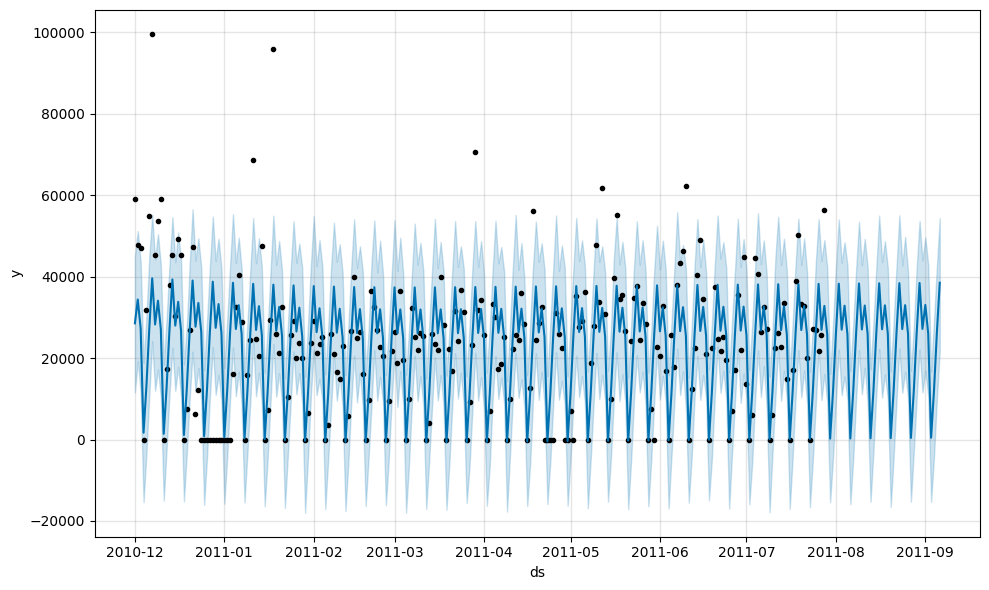

In [70]:
# additive ÏòµÏÖò ÏÇ¨Ïö©
prophet= Prophet(daily_seasonality = True, growth  = 'linear',seasonality_mode = 'additive')
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

##changepoint_range : 0.8 [default]

- change pointÏùò ÏÑ§Ï†ï Í∞ÄÎä• Î≤îÏúÑÎ•º ÏùòÎØ∏
- 0.8 Ïù¥Î©¥ Îç∞Ïù¥ÌÑ∞Ïùò 80% Ï§ë changepointÎ•º ÏûêÎèôÏúºÎ°ú ÏÑ§Ï†ïÌï®
Ï°∞Ï†à Î≤îÏúÑ [0.8,0.95]



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/a0hrkyjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/yi_ocjwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31476', 'data', 'file=/tmp/tmplueazx_e/a0hrkyjo.json', 'init=/tmp/tmplueazx_e/yi_ocjwq.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model19ue1cty/prophet_model-20230702085711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:57:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28756.398223  13734.381915  44369.209135
1 2010-12-02  34553.524320  17605.351870  50498.225630
2 2010-12-03  27529.762126  11879.858777  44209.286307
3 2010-12-04   2053.534015 -15395.673923  18469.468366
4 2010-12-05  13515.885655  -4291.714411  30213.604121


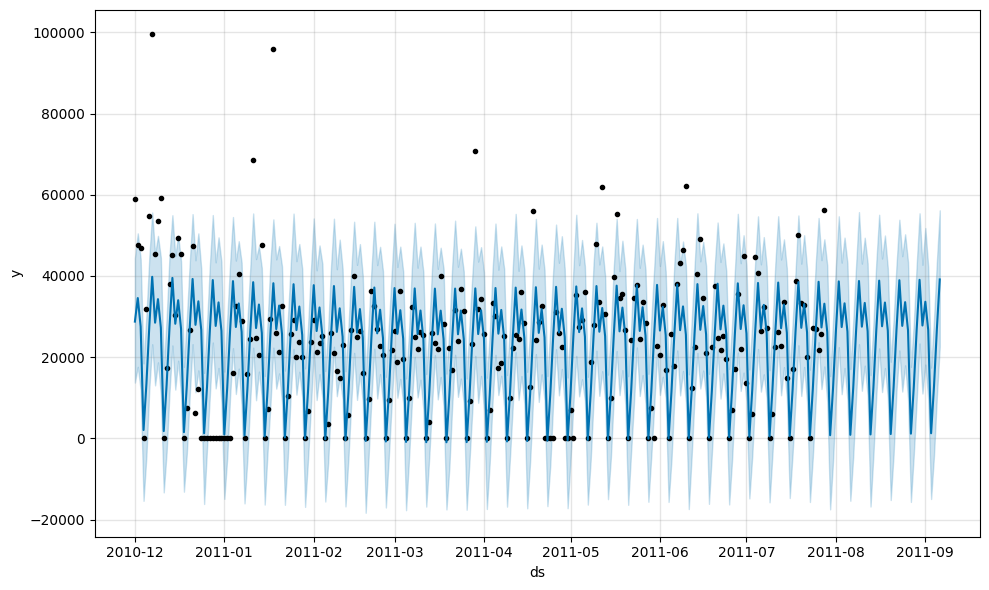

In [71]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear', changepoint_range = 0.5)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## growth : linear [default] üëçüëçüëç

- ÏòµÏÖò [liner, logistic] Ï°¥Ïû¨
- prophet logisticÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† Ìï† ÎïåÎäî cap, floorÏù¥ÎùºÎäî Í∞íÏùÑ ÏÑ§Ï†ï
Ï†ïÌï¥ÏßÑ Í∏∞Ï§ÄÏùÄ ÏóÜÍ≥† Î™®Îç∏ÏùÑ ÎèåÎ¶¨Í≥† ÌôïÏù∏Ìïú ÌõÑÏóê ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤ú



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/qoqnrkby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/_gjoz635.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36881', 'data', 'file=/tmp/tmplueazx_e/qoqnrkby.json', 'init=/tmp/tmplueazx_e/_gjoz635.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model8bdo1kti/prophet_model-20230702085815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:58:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  11787.104559  46034.126944
1 2010-12-02  34383.483376  18329.683398  50258.234931
2 2010-12-03  27295.727631  11307.842783  43962.587364
3 2010-12-04   1678.064316 -13828.608183  18840.244076
4 2010-12-05  13197.516084  -2508.204251  29448.229988


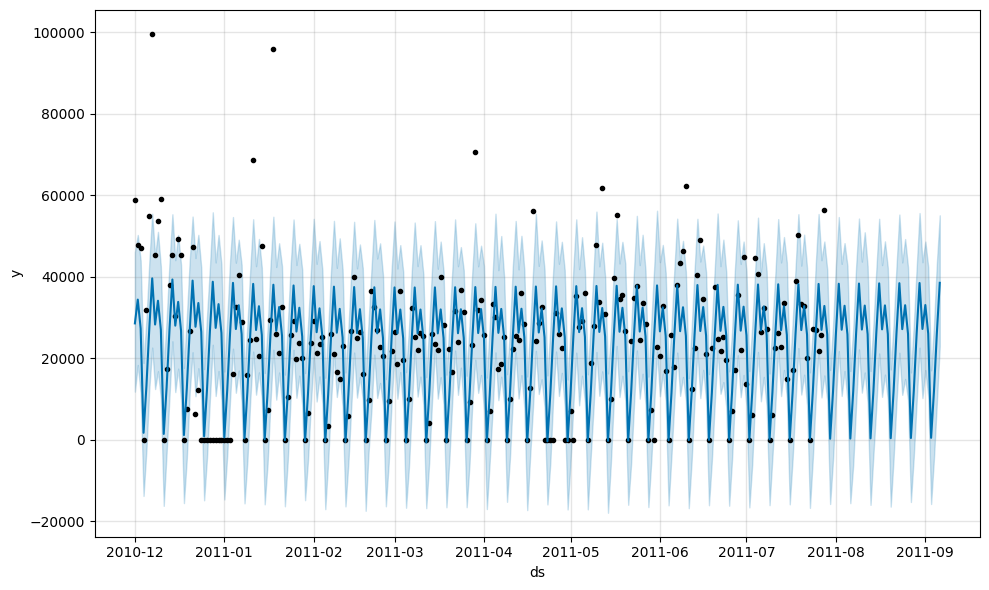

In [73]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear')
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## n_changepoints : 25 [default]

- ÏûêÎèôÏúºÎ°ú Î∞∞ÏπòÎêú Î≥ÄÍ≤ΩÏ†êÏùò Ïàò, ÏùºÎ∞òÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïùò Ï∂îÏÑ∏ Î≥ÄÌôîÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï∂©Î∂ÑÌïú ÏàòÎ°ú ÏÑ§Ï†ïÌï¥Ïïº Ìï®.
- Î≥ÄÍ≤ΩÏ†êÏùò ÏàòÎ•º ÎäòÎ¶¨Í±∞ÎÇò Ï§ÑÏù¥Îäî Í≤ÉÎ≥¥Îã§ Ï∂îÏÑ∏ Î≥ÄÌôîÏóêÏÑú Ïú†Ïó∞ÏÑ±ÏùÑ Î≥ÄÍ≤ΩÌïòÎäî Í≤ÉÏù¥ Îçî Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏùå

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/9faae22n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/h5wzy1bx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11916', 'data', 'file=/tmp/tmplueazx_e/9faae22n.json', 'init=/tmp/tmplueazx_e/h5wzy1bx.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modelwqlk7ny5/prophet_model-20230702085901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28545.263125  11992.121619  45342.416160
1 2010-12-02  34360.160571  18538.023026  50663.638814
2 2010-12-03  27304.500236  12535.082944  44234.693037
3 2010-12-04   1759.386902 -14302.857838  17940.595884
4 2010-12-05  13241.220576  -3269.040979  29449.783543


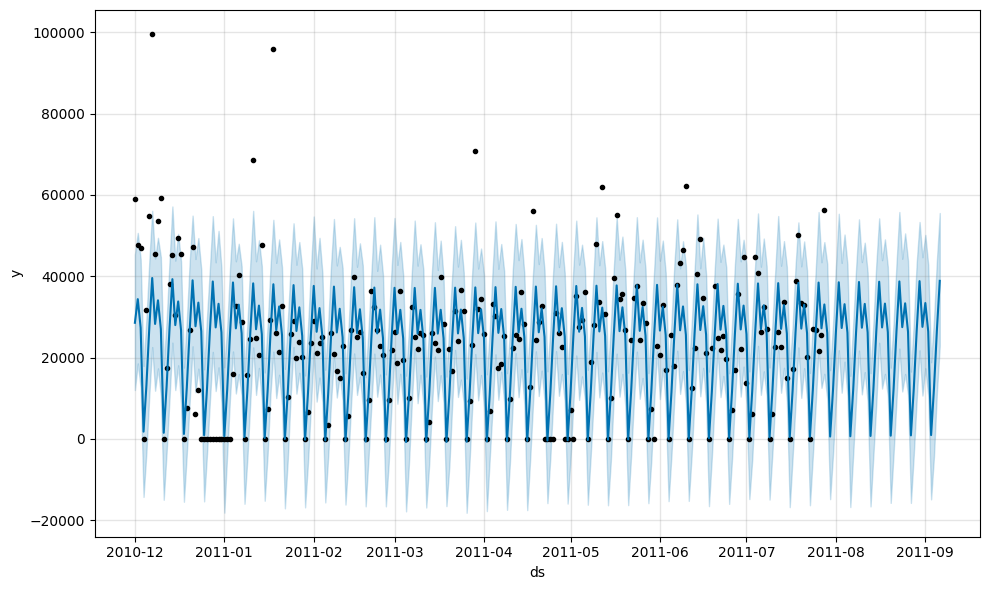

In [74]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear', n_changepoints = 20)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## yearly_seasonality : auto [default] üëçüëçüëçüëç

- Îç∞Ïù¥ÌÑ∞ÏôÄ Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±ÏùÑ Í∞ÄÏßÄÎ©¥ True ÏïÑÎãàÎ©¥ FalseÎ°ú ÏÑ§Ï†ï Ïù¥ÏôÄ Í∞ôÏù¥ weekly_seasonality,daily_seasonality Ï°¥Ïû¨
- Í∞ÅÍ∞ÅÏùò Í≥ÑÏ†àÏÑ±Ïù¥ Î≥¥Ïù∏Îã§Î©¥ ÌÇ§Í≥† seasonality_prior_scaleÏùÑ Ï°∞Ï†àÌïòÎäî Í≤å Ìö®Í≥ºÏ†Å

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/y4veonz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/p45hcbzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24869', 'data', 'file=/tmp/tmplueazx_e/y4veonz8.json', 'init=/tmp/tmplueazx_e/p45hcbzr.json', 'output', 'file=/tmp/tmplueazx_e/prophet_modelwjglo5lz/prophet_model-20230702090046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:00:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:00:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28892.047829  12001.643046  43324.626562
1 2010-12-02  34704.639173  18604.285272  50386.618466
2 2010-12-03  27642.021308  10790.459776  42468.313154
3 2010-12-04   2083.526503 -12671.689373  19444.226243
4 2010-12-05  13570.339129  -1820.879330  29370.486426


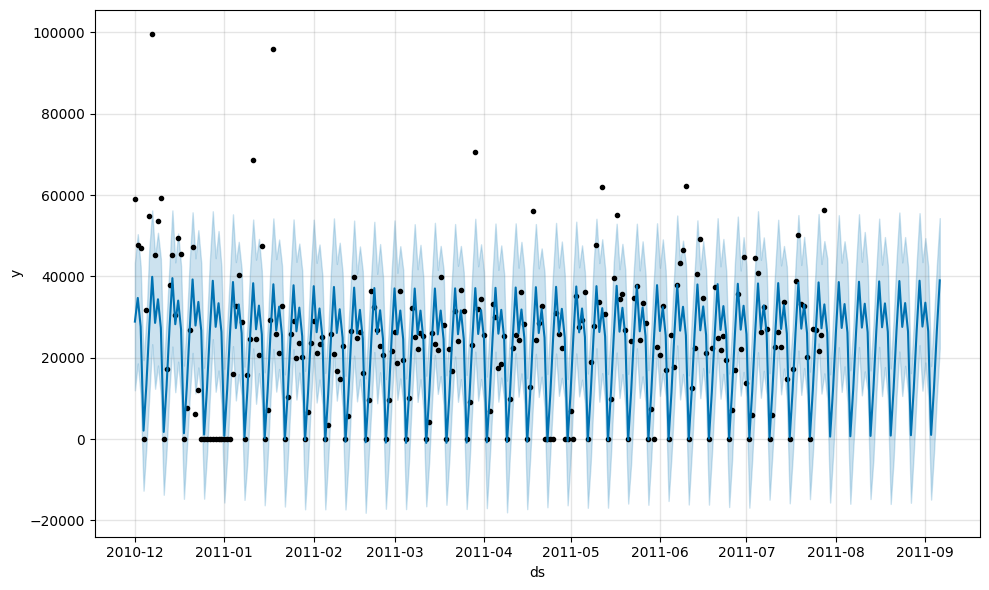

In [75]:
prophet= Prophet(weekly_seasonality = True, growth  = 'linear')
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## holidays
- ÏßÄÏ†ïÎêú Í≥µÌú¥ÏùºÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Ï†ÑÎã¨ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©
Ìú¥Ïùº Ìö®Í≥ºÎäî holidays_prior_scaleÏùÑ ÌÜµÌï¥ÏÑú Ï°∞Ï†ï

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/hh7pr_ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/1_c8h78g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7097', 'data', 'file=/tmp/tmplueazx_e/hh7pr_ai.json', 'init=/tmp/tmplueazx_e/1_c8h78g.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model2t0v59k4/prophet_model-20230702090216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:02:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:02:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  13154.463244  44516.412587
1 2010-12-02  34383.483376  18619.536978  51413.901302
2 2010-12-03  27295.727631  11270.899480  43423.978518
3 2010-12-04   1678.064316 -14269.601359  18734.707476
4 2010-12-05  13197.516084  -2664.158128  30050.117831


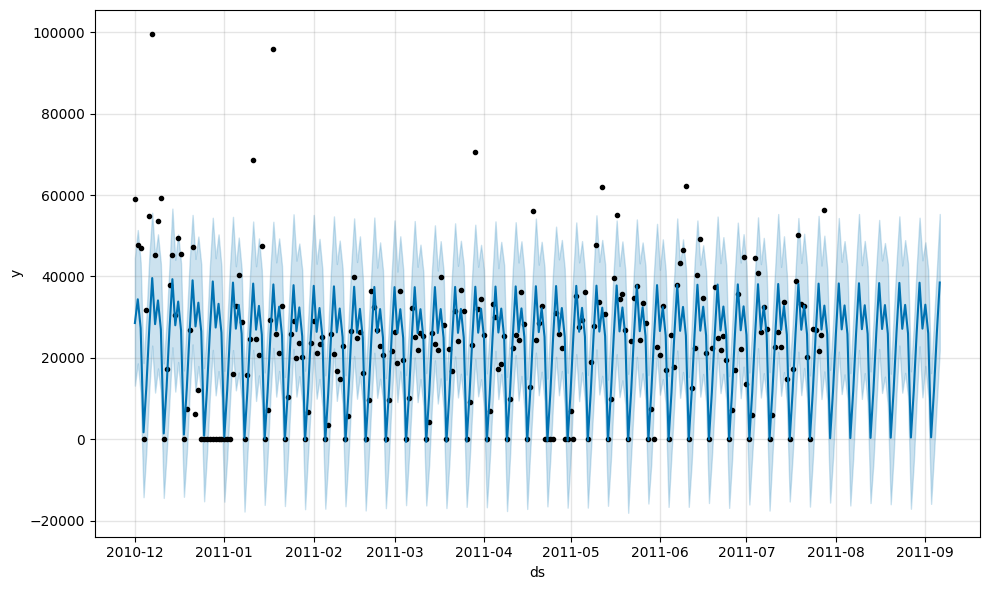

In [79]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear', holidays_prior_scale = '1')
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()

## interval_width : 0.8 [default]

- ProphetÏùò predictÏùÄ yhat_upper, yhat_lower ÏôÄ Í∞ôÏùÄ Î∂àÌôïÏã§ÏÑ± Íµ¨Í∞ÑÏùÑ Î∞òÌôòÌï®
- Ïù¥Í≤ÉÏùÄ Î∂àÌôïÏã§ÏÑ± Íµ¨Í∞ÑÏóêÎßå ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏòàÏ∏° yhatÏùÑ Ï†ÑÌòÄ Î≥ÄÍ≤ΩÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Ï°∞Ï†ïÌï† ÌïÑÏöî ÏóÜÏùå

## uncertainty_samples : 1000 [default]

- ÏúÑÏôÄ Í∞ôÏù¥ Î∂àÌôïÏã§ÏÑ±Ïùò Íµ¨Í∞ÑÏùÑ Ï°∞Ï†ïÌï®

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/zp3ewr85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplueazx_e/ery99z96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23578', 'data', 'file=/tmp/tmplueazx_e/zp3ewr85.json', 'init=/tmp/tmplueazx_e/ery99z96.json', 'output', 'file=/tmp/tmplueazx_e/prophet_model878thwxa/prophet_model-20230702090330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:03:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  28546.820925  19409.630598  36094.311147
1 2010-12-02  34383.483376  26352.125170  43541.232055
2 2010-12-03  27295.727631  19680.590341  36986.215613
3 2010-12-04   1678.064316  -7631.719923  10577.095426
4 2010-12-05  13197.516084   3676.005828  21526.183650


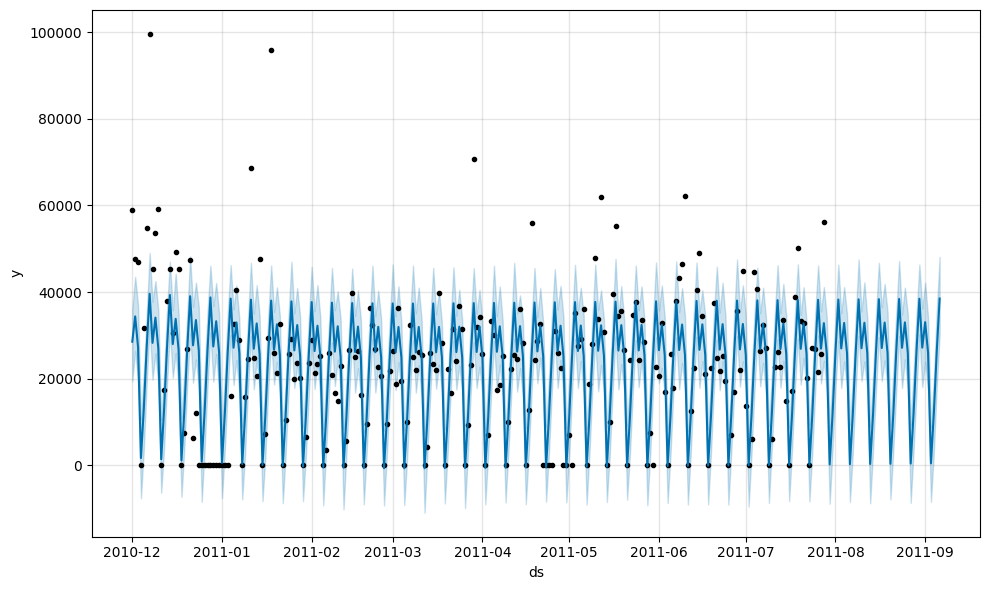

In [80]:
prophet= Prophet(daily_seasonality = True, growth  = 'linear', interval_width = 0.5)
prophet.fit(train)
# Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ ÏñºÎßàÎÇò ÏòàÏ∏°Ìï¥ÏÑú Ï∂úÎ†•Ìï† Í≤É Ïù∏Í∞Ä
future= prophet.make_future_dataframe(periods= 40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][240:] # Ïã§Ï†ú ÏòàÏ∏°Ìïú Í∞í
#forecast ÏãúÍ∞ÅÌôî
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plotÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÌôî
prophet.plot(forecast)
plt.show()